   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1      337.0        118.0                4.0  4.5  4.5  9.65   
1           2      324.0        107.0                4.0  4.0  4.5  8.87   
2           3        NaN        104.0                3.0  3.0  3.5  8.00   
3           4      322.0        110.0                3.0  3.5  2.5  8.67   
4           5      314.0        103.0                2.0  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  
Error cuadrático medio: 0.005658439400557586


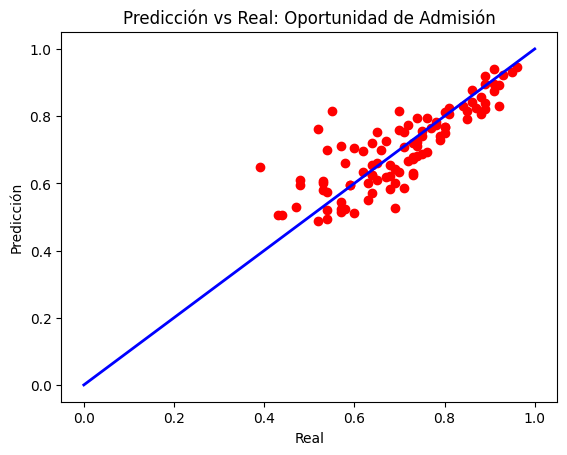

In [1]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Cargar el dataset
url = "https://raw.githubusercontent.com/bhabani24/Linear-Regression-datasets/main/Admission_Prediction.csv"
dataset = pd.read_csv(url)

# Ver las primeras filas para comprender la estructura del dataset
print(dataset.head())

# Selección de las variables predictoras (X) y la variable objetivo (y)
X = dataset.iloc[:, [1, 2, 3, 4]].values  # Seleccionar GRE, CGPA, TOEFL, y University Rating
y = dataset.iloc[:, -1].values  # Variable objetivo: Chance of Admit

# Imputación de valores faltantes si existieran
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
X = imputer.fit_transform(X)

# Aplicamos una transformación no lineal (logaritmo) sobre las variables predictoras
# Por ejemplo, logaritmo de CGPA y GRE para capturar posibles no linealidades
X[:, 1] = np.log(X[:, 1] + 1)  # Transformación logaritmica en CGPA (CGPA es positivo, por lo que el logaritmo es válido)
X[:, 0] = np.log(X[:, 0] + 1)  # Transformación logaritmica en GRE

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y ajustar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Visualización de resultados
plt.scatter(y_test, y_pred, color="red")
plt.plot([0, 1], [0, 1], color="blue", lw=2)  
plt.title("Predicción vs Real: Oportunidad de Admisión")
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.show()
